# Paris House prediction - XG Boost Regression

We will perform a regression using XG boost regression algorithm to predict house prices in Paris from the given dataset in [https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction/data].


# Dataset summary

Here we are going to predict the price of the house using the given below independent features.  


* squareMeters
* numberOfRooms
* hasYard
* hasPool
* floors - number of floors
* cityCode - zip code
* cityPartRange - the higher the range, the more exclusive the neighbourhood is
* numPrevOwners - number of prevoious owners
* made - year
* isNewBuilt
* hasStormProtector
* basement - basement square meters
* attic - attic square meteres
* garage - garage size
* hasStorageRoom
* hasGuestRoom - number of guest rooms
* price - predicted value






In [2]:
# First let unzip the folder

!unzip'/content/drive/MyDrive/XG boost regression- Paris house prediction/Paris house prediction.zip'

/bin/bash: line 1: unzip/content/drive/MyDrive/XG boost regression- Paris house prediction/Paris house prediction.zip: No such file or directory


#Importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Loading the Dataset


In [5]:
df= pd.read_csv('/content/drive/MyDrive/XG boost regression- Paris house prediction/Paris house prediction.zip')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


# Data Exploration

In [6]:
# Cheking the shape of the Dataset
df.shape

(10000, 17)

In [7]:
# Let see the information about each columns and its datatype.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

It seems there are no null values present in the dataset. Also all the columns are numeric. So there are no imputations required. But we need to check the each columns unique data to confirm.

In [8]:
#Checking the summary of null values in each column
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
# Let see the statistical inference of each column

df. describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Looks there are no outliers present in the dataset. Looks like a clean data. Lets check with visulization.

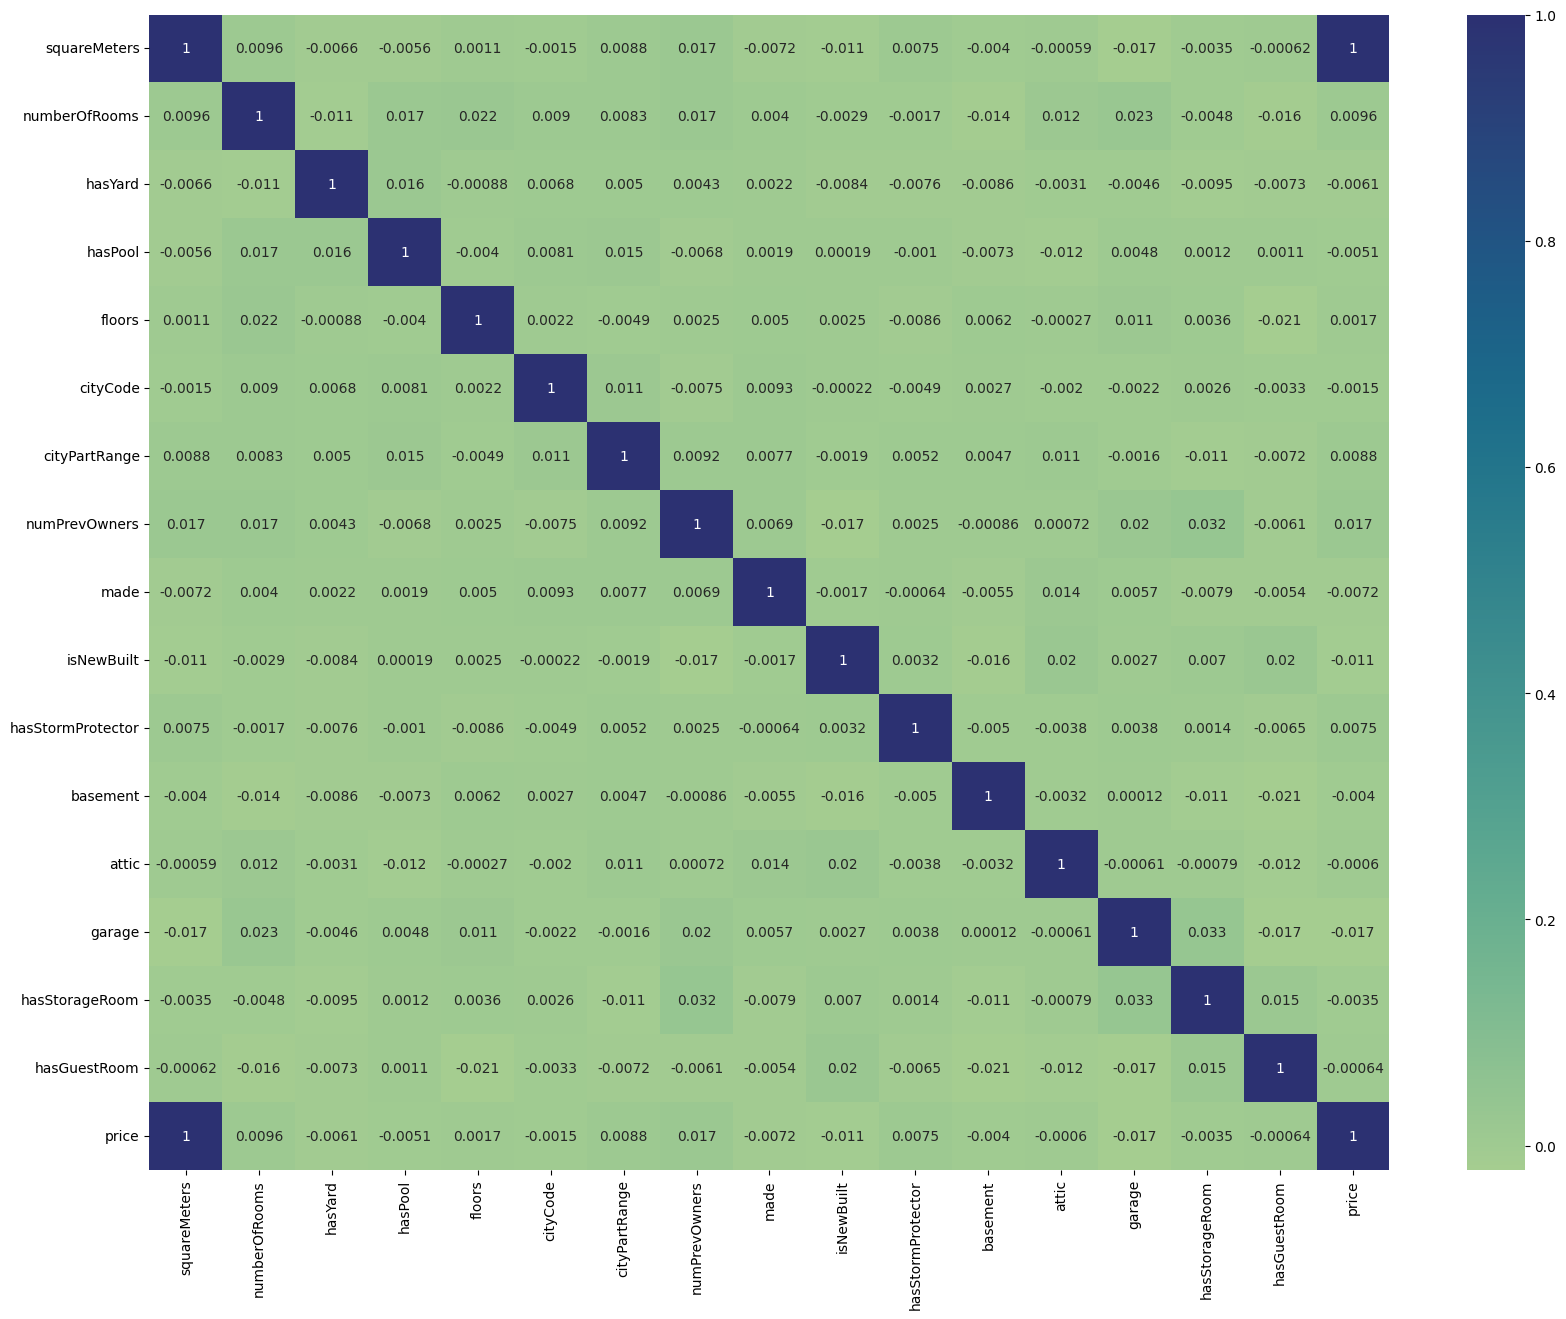

In [10]:
# Lets check the correlation between the features using heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot= True, cmap= 'crest')
plt.show()

It seems there are no close correlation between the features, except Squaremeters and price is having the close correlation.

## Data pre-processing

In [11]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [12]:
df['price'].unique()

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

The dataset is clean, there are no null values, equally distributed,  and there are no pre-processing and EDA is required.

Next we are proceed with the model training and predicting the result.

# Define X and Y for training and testing

In [15]:
df.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1


In [26]:
# Define X and Y and convert to array

X= df.iloc[:,:-1].values
X.shape

(10000, 16)

In [27]:
Y = df.iloc[:,-1].values
Y.shape

(10000,)

# Segregating the dataset for training and testing

In [34]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2, random_state=45)

In [35]:
# Checking the shape of X and Y after splitting

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

# Training XG Boost regression model for prediction

In [36]:
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Now our model has trained. Lets predict the result. Then we use hyper parameters to tune the accuracy.

In [39]:
y_pred = model.predict(X_test)
y_pred

array([9241679. , 3724749.8, 3642052. , ..., 6307731. , 8611277. ,
       4278136.5], dtype=float32)

# Checking the accuracy using r2 score

In [41]:
accuracy= r2_score(Y_test,y_pred)
accuracy

0.999975207986677

Our model has predicted close to 100% score. So, We don't require any hyper parameter tuning to improve accuracy.